## E-Commerce 고객(수요) 데이터 불러오기 & 전처리

### E-Commerce 데이터 다운로드 (users)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 url.
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

In [ ]:
user_metadata_df.shape, user_stats_df.shape

((3412, 10), (3412, 11))

In [ ]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [ ]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


### E-Commerce 고객 메타데이터 둘러보기 (metadata)

In [ ]:
user_metadata_df.dtypes

,0
user_id,object
sex,int64
birthday_year,int64
membership_type,int64
category_prefer,int64
joined_date,object
deleted_date,object
join_path,float64
os,object
recommended_cnt,int64


### E-Commerce 고객 메타데이터 전처리하기 (metadata)


In [ ]:
this_year = 2025
user_metadata_df["age"] = this_year - user_metadata_df["birthday_year"] + 1
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,31
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,31


In [ ]:
today_ymd = datetime(2025,1,1)

user_metadata_df["joined_date"] = user_metadata_df["joined_date"].astype('datetime64[ns]')

user_metadata_df["days_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days


user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days / 365
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,31,1941,5.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,31,1724,4.7


In [ ]:
user_metadata_df["if_deleted"] = np.where(user_metadata_df["deleted_date"]=="NaT", 0, 1)
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,31,1941,5.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,31,1724,4.7,0


### E-Commerce 고객 거래데이터 둘러보기 (transaction data)

In [ ]:
user_stats_df.dtypes

,0
user_id,object
membership_type,int64
total_order_cnt,float64
total_cost,float64
avg_coupon_amt,float64
avg_point_amt,float64
weekly_order_cnt,float64
monthly_order_cnt,float64
avg_cost,float64
avg_item_cost,float64


### E-Commerce 고객 거래데이터 전처리하기 (transaction data)

In [ ]:
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [ ]:
oldest_ymd = datetime(2019,12,31)

user_stats_df["last_date"] = user_stats_df["last_date"].astype('datetime64[ns]')
user_stats_df["days_of_recency"] = (user_stats_df["last_date"] - oldest_ymd).dt.days

## Clustering - 고객(수요) 메타데이터를 이용한 군집화



### EDA

In [ ]:
print(user_metadata_df.isnull().sum(axis = 0))

user_id              0
sex                  0
birthday_year        0
membership_type      0
category_prefer      0
joined_date          0
deleted_date         0
join_path            0
os                   0
recommended_cnt      0
age                  0
days_from_joined     0
years_from_joined    0
if_deleted           0
dtype: int64


In [ ]:
user_metadata_df["join_path"] = user_metadata_df["join_path"].fillna(0)

In [ ]:
user_metadata_df[user_metadata_df.duplicated(["user_id"])]

# user_metadata_df.drop_duplicates(subset="user_id")

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted


In [ ]:
user_metadata_df.groupby(["membership_type"])[["user_id"]].count().reset_index()

,membership_type,user_id
0,100,2667
1,300,513
2,400,126
3,500,106


In [ ]:
user_cnt_from_joined_df = user_metadata_df.groupby(["years_from_joined"])[["user_id"]].count().reset_index()

fig = px.bar(user_cnt_from_joined_df, x="years_from_joined", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
user_cnt_by_ctg_df = user_metadata_df.groupby(["category_prefer"])[["user_id"]].count().reset_index()

fig = px.bar(user_cnt_by_ctg_df, x="category_prefer", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
user_cnt_by_recomm_df = user_metadata_df.groupby(["recommended_cnt"])[["user_id"]].count().reset_index()

fig = px.bar(user_cnt_by_recomm_df, x="recommended_cnt", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

### EDA  2차원

In [ ]:
corr_matrix = user_metadata_df.select_dtypes(exclude='object').corr()
corr_matrix

,sex,birthday_year,membership_type,category_prefer,joined_date,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,0.016833,-0.017552,-0.013729,0.005282,-0.016833,-0.016320,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.138338,0.009461,0.258950,-1.000000,-0.138338,-0.138195,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,-0.037165,0.019963,-0.021604,0.069491,0.037165,0.037084,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.007478,0.002226,0.171625,-0.504292,-0.007478,-0.007202,0.013642
joined_date,0.016833,0.138338,-0.037165,0.007478,1.000000,0.064171,-0.186742,-0.138338,-1.000000,-0.999717,0.010898
join_path,-0.017552,0.009461,0.019963,0.002226,0.064171,1.000000,0.006406,-0.009461,-0.064171,-0.063753,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,-0.186742,0.006406,1.000000,-0.258950,0.186742,0.187290,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.138338,-0.009461,-0.258950,1.000000,0.138338,0.138195,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-1.000000,-0.064171,0.186742,0.138338,1.000000,0.999717,-0.010898
years_from_joined,-0.016320,-0.138195,0.037084,-0.007202,-0.999717,-0.063753,0.187290,0.138195,0.999717,1.000000,-0.011617


In [ ]:
corr_matrix[abs(corr_matrix)>=0.2]

,sex,birthday_year,membership_type,category_prefer,joined_date,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,NaN,-0.504292,NaN,NaN,NaN
joined_date,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-1.000000,-0.999717,NaN
join_path,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,1.000000,0.999717,NaN
years_from_joined,NaN,NaN,NaN,NaN,-0.999717,NaN,NaN,NaN,0.999717,1.000000,NaN


In [ ]:
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,joined_date,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,0.016833,-0.017552,-0.013729,0.005282,-0.016833,-0.016320,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.138338,0.009461,0.258950,-1.000000,-0.138338,-0.138195,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,-0.037165,0.019963,-0.021604,0.069491,0.037165,0.037084,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.007478,0.002226,0.171625,-0.504292,-0.007478,-0.007202,0.013642
joined_date,0.016833,0.138338,-0.037165,0.007478,1.000000,0.064171,-0.186742,-0.138338,-1.000000,-0.999717,0.010898
join_path,-0.017552,0.009461,0.019963,0.002226,0.064171,1.000000,0.006406,-0.009461,-0.064171,-0.063753,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,-0.186742,0.006406,1.000000,-0.258950,0.186742,0.187290,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.138338,-0.009461,-0.258950,1.000000,0.138338,0.138195,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-1.000000,-0.064171,0.186742,0.138338,1.000000,0.999717,-0.010898
years_from_joined,-0.016320,-0.138195,0.037084,-0.007202,-0.999717,-0.063753,0.187290,0.138195,0.999717,1.000000,-0.011617


In [ ]:
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["category_prefer"])
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["recommended_cnt"])
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
user_metadata_df.pivot_table(values="user_id", index="sex", columns="join_path", aggfunc='count')


join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


### 고객 메타데이터 정제 및 데이터셋 분리

In [ ]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head(2)

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,31,1941,5.3,0
1,1,1995,300,2,0.0,1,31,1724,4.7,0


In [ ]:
user_numerics_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0, 1]).all()]
user_numerics_df = user_numerics_df.drop(user_numerics_cols, axis=1)
user_numerics_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,31,1941,5.3
1,1995,300,2,1,31,1724,4.7


In [ ]:
user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove("membership_type")
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [ ]:
user_numerics_df.describe()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1990.516706,153.575615,4.596717,2.291325,35.483294,2120.414127,5.808675
std,7.669478,106.964154,3.403961,2.455373,7.669478,443.232127,1.214628
min,1967.000000,100.000000,0.000000,0.000000,20.000000,1462.000000,4.000000
25%,1986.000000,100.000000,2.000000,0.000000,30.000000,1751.750000,4.800000
50%,1993.000000,100.000000,4.000000,2.000000,33.000000,2064.000000,5.700000
75%,1996.000000,100.000000,7.000000,4.000000,40.000000,2430.000000,6.700000
max,2006.000000,500.000000,17.000000,21.000000,59.000000,3278.000000,9.000000


In [ ]:
X = user_numerics_df[user_x_columns]
Y = user_numerics_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=810)
print(len(train_x), len(test_x))

2729 683


### 정제된 메타데이터로 최적의 k 찾기 (Elbow method)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
distortions = []
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[531031856.1659877, 155240128.01829964, 70965639.69155225, 40763262.2640891, 26043016.64086579, 19068906.82965258, 14207592.514421187, 10686336.349331027, 8304960.6741632875, 6868482.377089883]


In [ ]:
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 정제된 메타데이터로 K-Means 훈련

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(train_x)

KMeans(n_clusters=3)

### 훈련된 K-Means 결과 확인/해석

In [ ]:
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.743881,4.724650,1.940559,34.256119,1702.548077,4.663374
1,1989.176768,4.680135,3.188552,36.823232,2774.134680,7.599495
2,1989.976791,4.468214,2.286579,36.023209,2201.628658,6.031483


### 최종 훈련모델의 결과를 시각화

In [ ]:
train_x["label_from_km"] = km.labels_
train_x.groupby(["label_from_km"]).count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,1145,1145,1145,1145,1145,1145
1,593,593,593,593,593,593
2,991,991,991,991,991,991


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
 fig = go.Figure(data=[go.Scatter3d(x=train_x["recommended_cnt"],
                                   y=train_x["years_from_joined"],
                                   z=train_x["age"],
                                   mode='markers',
                                   marker=dict(color=train_x["label_from_km"]))])
fig.show()

### 메타데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)

scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [ ]:
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
!pip install kneed

In [ ]:
distortions = []
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[683.7525819013521, 445.851469715176, 295.0710628662713, 255.04177947194643, 216.55493529556713, 192.5457873971561, 175.85885261511234, 163.07048240488655, 154.21667148807447, 145.0267603485235]


In [ ]:
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 295.071


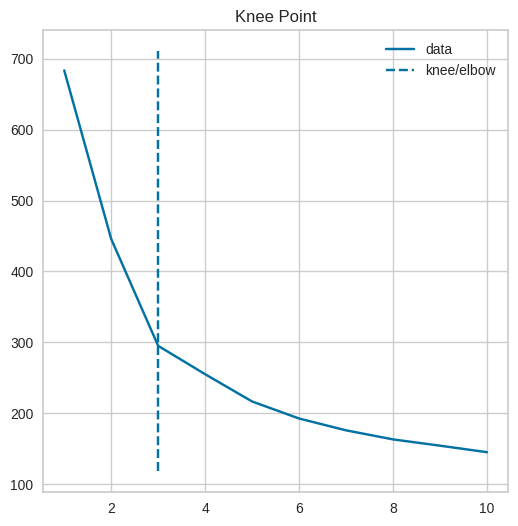

In [ ]:
kneedle.plot_knee()

### 정제된 메타데이터로 최적의 k 찾기 (Silhouette method)

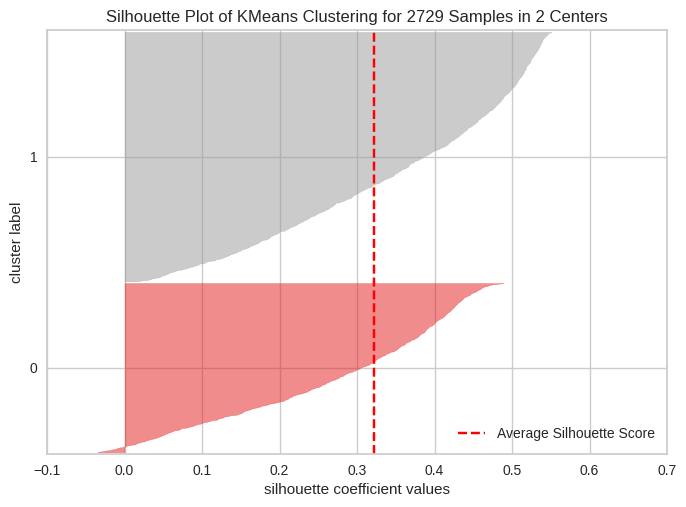

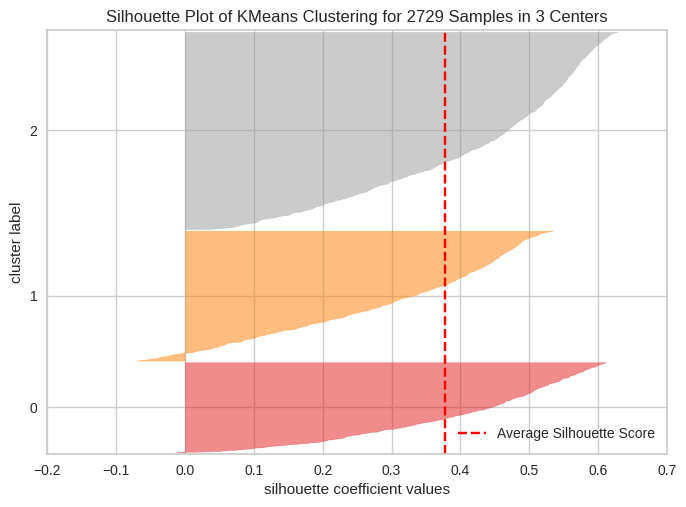

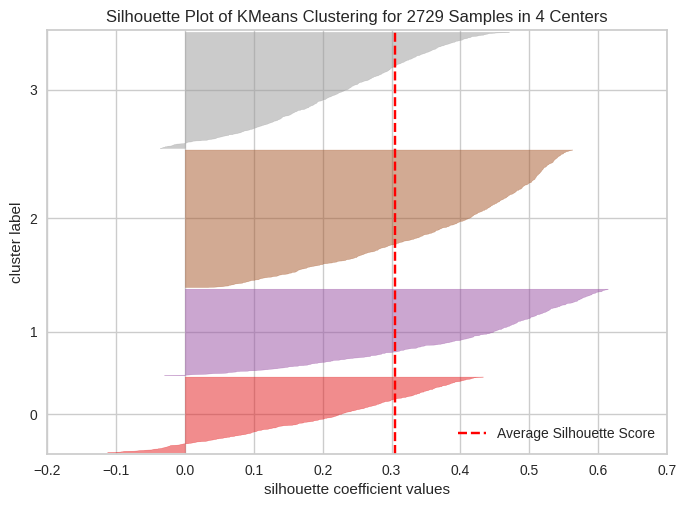

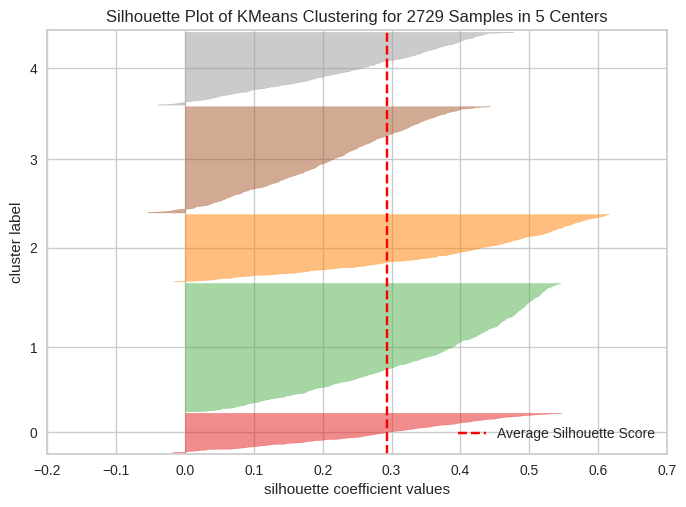

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

k_range = range(2,6)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_x)
    visualizer.poof()

### 정규화된 데이터로 훈련된 K-Means 결과 확인/해석

In [ ]:
km = KMeans(n_clusters = 3, random_state=66)
km.fit(train_x)

KMeans(n_clusters=3, random_state=66)

In [ ]:
user_metadata_cluser_centers = pd.DataFrame(km.cluster_centers_, columns=train_x.columns)
user_metadata_cluser_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.730225,0.339995,0.112079,0.269775,0.202858,0.202826
1,0.306469,0.088987,0.047862,0.693531,0.289548,0.288995
2,0.614870,0.288076,0.150897,0.385130,0.652594,0.650319


In [ ]:
user_metadata_label_df = train_x.copy()

user_metadata_label_df["label_from_km"] = km.labels_
user_metadata_label_df.groupby(["label_from_km"]).count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,1293,1293,1293,1293,1293,1293
1,588,588,588,588,588,588
2,848,848,848,848,848,848


In [ ]:
user_metadata_cluser_centers.std()

,0
birthday_year,0.219084
category_prefer,0.132500
recommended_cnt,0.052036
age,0.219084
days_from_joined,0.238600
years_from_joined,0.237427


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=user_metadata_label_df["category_prefer"],
                                   y=user_metadata_label_df["years_from_joined"],
                                   z=user_metadata_label_df["age"],
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=user_metadata_label_df["label_from_km"],
                                            opacity=0.7
                                        )
                                    )])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="category_prefer"),
                    yaxis = dict(
                        title="years_from_joined"),
                    zaxis = dict(
                        title="age"),),
                )
fig.show()

### 훈련된 모델에 test set을 사용해 예측

In [ ]:
test_user_metadata_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)

test_user_metadata_label_df["label_from_km"] = test_cluster

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=test_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=test_user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
trained_user_metadata_df = pd.concat([user_metadata_label_df, test_user_metadata_label_df])

trained_user_metadata_df = user_metadata_df.join(trained_user_metadata_df[["label_from_km"]])
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,31,1941,5.3,0,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,31,1724,4.7,0,0


## Clustering - 고객(수요) 거래데이터를 이용한 군집화


### HDBSCAN 모델 설치 & 데이터 셋 분리하기


In [ ]:
# !pip install hdbscan

In [ ]:
user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17


In [ ]:
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [ ]:
stats_columns = ['total_order_cnt', 'total_cost',
                  'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
                  'monthly_order_cnt', 'avg_cost', 'avg_item_cost',
                  'days_of_recency']

X = user_stats_df[stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [ ]:
hdb_data_df = train_x.copy()

### HDBSCAN 모델 파라미터 탐색


In [ ]:
import hdbscan

In [ ]:
def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="total_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세확인. (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [ ]:
ms_list = [50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="hdbscan_label", x_col="avg_cost" , y_col="total_cost")


               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   48.252451  1.926611e+06     -795.260956      -1.100050   
0                    24.946809  8.116453e+05     -873.770189      -6.169524   
1                     1.190741  3.420404e+04     -520.430996     -76.002315   
2                    11.179104  3.419636e+05     -659.496880      -8.223738   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.342403           8.523039  41833.183480   
0                      1.663624           4.645213  35609.812660   
1                      1.039398           1.096026  29887.663468   
2                      1.398555           2.791294  33467.077612   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                            

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   46.800937  1.864257e+06     -799.610656      -1.051102   
0                    24.934066  8.038425e+05     -880.601317      -6.372914   
1                    10.826087  3.325063e+05     -619.660936     -11.978053   
2                     1.201848  3.448574e+04     -519.559001     -75.826790   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.309203           8.322248  41509.262927   
0                      1.660150           4.608608  35399.679231   
1                      1.388098           2.643478  33773.433478   
2                      1.039228           1.096490  29891.688000   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                            

### HDBSCAN 모델에 원데이터 훈련

In [ ]:
ms = 50
hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=ms, prediction_data=True).fit_predict(train_x)
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

In [ ]:
# outlier 추세확인
hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

fig = px.scatter(hdb_data_df, x="avg_cost", y="total_cost", color="hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

hdb_cluster_df = hdb_data_df.groupby("hdbscan_label").mean()
hdb_cluster_df["point_cnt"] = hdb_data_df["hdbscan_label"].value_counts()
hdb_cluster_df

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,point_cnt
hdbscan_label,,,,,,,,,,
-1,48.252451,1.926611e+06,-795.260956,-1.100050,2.342403,8.523039,41833.183480,27001.973603,172.458333,408
0,24.946809,8.116453e+05,-873.770189,-6.169524,1.663624,4.645213,35609.812660,22388.519574,171.734043,94
1,1.190741,3.420404e+04,-520.430996,-76.002315,1.039398,1.096026,29887.663468,18960.577940,62.093519,2160
2,11.179104,3.419636e+05,-659.496880,-8.223738,1.398555,2.791294,33467.077612,20522.630746,166.194030,67


### 원데이터에서 불필요한 정보 제거

In [ ]:
corr_matrix = user_stats_df.select_dtypes(exclude='object').corr()
corr_matrix[corr_matrix > 0.7]

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
membership_type,1.000000,0.754893,NaN,NaN,NaN,NaN,0.740572,NaN,NaN,NaN,NaN
total_order_cnt,0.754893,1.000000,0.844748,NaN,NaN,0.920791,0.981847,NaN,NaN,NaN,NaN
total_cost,NaN,0.844748,1.000000,NaN,NaN,0.792244,0.829667,NaN,NaN,NaN,NaN
avg_coupon_amt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_point_amt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,0.920791,0.792244,NaN,NaN,1.000000,0.956138,NaN,NaN,NaN,NaN
monthly_order_cnt,0.740572,0.981847,0.829667,NaN,NaN,0.956138,1.000000,NaN,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
avg_item_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
last_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [ ]:
selected_stats_columns = ["total_order_cnt", "avg_coupon_amt", "avg_point_amt", "avg_cost", "days_of_recency", "avg_item_cost"]

X = user_stats_df[selected_stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [ ]:
hdb_data_df = train_x.copy()

ms_list = [30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost" , y_col="total_order_cnt")

                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        13.269022    -1479.602172     -85.088006   
0                          1.706856      -22.644781       0.000000   
1                          9.243949     -243.174481     -11.298834   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  40943.377242        92.896739   24020.455041        736  
0                   25967.199149        75.806147      43.383995        423  
1                   29615.625427        82.309554   23971.888936       1570  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        10.523244    -1102.551123     -61.963627   
0                          9.382294     -242.981174     -11.883780   
1                          1.782609      -35.908385       0.000000   
2                          1.607735       -9.579969       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  37370.347864        88.523244   19503.453630       1011  
0                   29612.572515        82.215292   23886.147505       1491  
1                   15010.339130        80.000000      13.858696         46  
2                   27573.148619        76.817680       2.192928        181  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        10.584867     -968.977510     -64.054424   
0                          9.090679     -336.053200     -11.235710   
1                          1.798851      -15.712496       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  37498.874714        87.132924   18759.014540        978  
0                   29312.424502        82.734940   23450.094375       1577  
1                   27099.941954        80.316092      35.384598        174  


In [ ]:
selected_stats_columns = ["total_order_cnt", 'total_cost', 'avg_cost', 'days_of_recency', "monthly_order_cnt"]

trim_df = user_stats_df[user_stats_df["total_order_cnt"]>=10]

X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

504 127


In [ ]:
trim_hdb_data_df = train_x.copy()

In [ ]:
ms_list = [10, 20, 30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, trim_hdb_data_df, min_cluster_size=10, label_name="trim_hdbscan_label", x_col="avg_cost" , y_col="total_order_cnt")

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        87.132530  4.341762e+06  56733.877108   
0                         76.909091  3.164203e+06  44193.568182   
1                         66.933333  2.700561e+06  41716.061333   
2                         57.666667  2.064456e+06  38087.557273   
3                         38.071429  1.750899e+06  52393.530714   
4                         26.675676  8.999734e+05  35342.796697   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       175.879518          14.992169         83  
0                        178.727273          12.981818         11  
1                        179.100000          11.313333         30  
2                        177.121212           9.693939         33  
3                        176.785714           6.930952 

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        88.688172  4.296380e+06  54108.433226   
0                         66.384615  2.731304e+06  43072.684231   
1                         27.469101  9.507826e+05  36350.504438   
2                         56.965517  2.050491e+06  38390.322414   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       176.795699          15.204480         93  
0                        177.615385          11.246154         26  
1                        171.640449           5.135908        356  
2                        177.275862           9.494253         29  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        78.386364  3.663283e+06  51314.902197   
0                         64.937500  2.757276e+06  45686.148750   
1                         59.750000  2.022610e+06  36283.708750   
2                         26.655882  9.073194e+05  35649.965294   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       177.090909          13.456439        132  
0                        177.187500          10.822917         16  
1                        177.625000           9.958333         16  
2                        171.329412           5.004069        340  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        47.898219  2.004052e+06  41867.604987   
0                         25.597701  8.007561e+05  33975.705172   
1                         14.750000  4.692496e+05  33175.745833   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       173.175573           8.436344        393  
0                        173.000000           4.818199         87  
1                        174.833333           3.144444         24  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        47.880102  1.999456e+06  41573.666199   
0                         14.312500  4.795519e+05  35110.534375   
1                         25.072917  8.027130e+05  34869.034479   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       174.066327           8.427083        392  
0                        165.687500           3.409375         16  
1                        171.041667           4.710069         96  


### 정규화


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

stand_scaler = StandardScaler()
scaled_user_trans = stand_scaler.fit_transform(X)

scaled_user_trans_df = pd.DataFrame(scaled_user_trans, columns=X.columns)
scaled_user_trans_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt
0,-0.717385,-0.592822,-0.409145,0.118127,-0.520225
1,-0.747089,-0.312006,0.871160,0.118127,-0.724615
2,1.480762,0.845128,-0.137871,0.365146,1.390377
3,-0.390633,-0.428904,-0.413519,0.550410,-0.298062
4,0.411393,0.617040,0.462381,0.488655,0.323994


In [ ]:
scaled_user_trans_df.index = X.index

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(scaled_user_trans_df, Y, test_size=0.1)
print(len(train_x), len(test_x))

567 64


In [ ]:
scaled_hdb_data_df = train_x.copy()

In [ ]:
ms_list = [1, 3, 5, 10, 20]
scaled_hdb_data_df = opt_hdbscan(train_x, ms_list, scaled_hdb_data_df, min_cluster_size=10, label_name="scaled_hdbscan_label", x_col="total_order_cnt" , y_col="days_of_recency")

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.991438    1.188883  0.866064        -0.864942   
0                           -0.770853   -0.561542 -0.144126        -1.953746   
1                           -0.107088   -0.151389 -0.130067         0.222313   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             1.127784         74  
0                             -0.702251         20  
1                             -0.133132        473  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.630751    0.792595  0.633487        -0.814727   
0                           -0.797587   -0.551252 -0.000263        -1.697464   
1                           -0.111094   -0.158450 -0.146127         0.229095   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.765700        104  
0                             -0.750683         10  
1                             -0.145004        453  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.164667    0.188780  0.153047        -0.302663   
0                            1.278230    0.447358 -0.390771         0.471813   
1                            0.810624    0.543053 -0.010325         0.463954   
2                           -0.370229   -0.342060 -0.206891         0.379575   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.204283        317  
0                              1.188411         11  
1                              0.722110         25  
2                             -0.417961        214  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.159393    0.156557  0.112850        -0.225766   
0                            0.749461    0.479628 -0.032954         0.456308   
1                           -0.365172   -0.340216 -0.223632         0.410274   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.185887        364  
0                              0.661118         21  
1                             -0.412676        182  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.180274    0.174448  0.123914        -0.220667   
0                            0.757948    0.468554 -0.052219         0.441604   
1                           -0.395265   -0.362911 -0.235635         0.388387   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.203977        360  
0                              0.669581         21  
1                             -0.435772        186  


### HDBSCAN 모델에 정규화된 데이터 훈련

In [ ]:
ms=3
hdb_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=ms, prediction_data=True).fit(train_x)
hdbscan_label = hdb_model.labels_
scaled_hdb_data_df["scaled_hdbscan_label"] = hdbscan_label
scaled_hdb_data_df["scaled_hdbscan_label"] = scaled_hdb_data_df["scaled_hdbscan_label"].astype(str)
scaled_hdb_data_df.head(2)

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
1507,-0.271814,-0.300920,-0.257761,0.241636,-0.357306,1
1791,-0.450043,-0.387313,-0.214375,-2.105045,-0.369154,-1


In [ ]:
# outlier 추세확인
hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화하기
# x_col="total_order_cnt" , y_col="days_of_recency"
fig = px.scatter(scaled_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인
trim_hdb_cluster_df = scaled_hdb_data_df.groupby("scaled_hdbscan_label").mean()
trim_hdb_cluster_df["point_cnt"] = scaled_hdb_data_df["scaled_hdbscan_label"].value_counts()
trim_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.630751,0.792595,0.633487,-0.814727,0.765700,104
0,-0.797587,-0.551252,-0.000263,-1.697464,-0.750683,10
1,-0.111094,-0.158450,-0.146127,0.229095,-0.145004,453


In [ ]:
scaled_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
1507,-0.271814,-0.300920,-0.257761,0.241636,-0.357306,1
1791,-0.450043,-0.387313,-0.214375,-2.105045,-0.369154,-1
175,0.114347,0.201945,0.209393,0.550410,0.027777,1
1440,0.441098,0.096438,-0.271999,-0.375911,0.353616,1
1496,-0.747089,-0.622792,-0.473687,0.426901,-0.564658,1


In [ ]:
COL_LIST = ["total_order_cnt", "total_cost", "avg_cost", "days_of_recency"]
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"coral", -1:"grey"}

fig = make_subplots(rows=4, cols=5)

# i: x축이될 변수명
for i in range(0, len(COL_LIST)+1):
  # i=5이면 중지.
  if i == len(COL_LIST): break
  x_col = COL_LIST[i]
  # j: y축이될 변수명
  for j in range(i, len(COL_LIST)+1):
    # j=5이면 중지
    if j == len(COL_LIST): break
    y_col = COL_LIST[j]

    # label별로 색깔 할당
    for c in range(0, len(set(hdbscan_label))):
      sub_df = scaled_hdb_data_df[scaled_hdb_data_df["scaled_hdbscan_label"]==f"{c-1}"]
      fig.add_trace(
          go.Scatter(x=sub_df[x_col],
                    y=sub_df[y_col],
                    mode="markers",
                    marker=dict(color=LABEL_COLOR[c-1], opacity=0.5),
                    name=f"{c-1}",
                    legendgroup=f"{c-1}",

                    ),
          row=i+1, col=j+1
      )
    fig.update_xaxes(title_text=f"{x_col}", row=i+1, col=j+1)
    fig.update_yaxes(title_text=f"{y_col}", row=i+1, col=j+1)

fig.update_layout(height=1500, width=1500)
fig.show()


### HDBSCAN 모델에 test 데이터 예측

In [ ]:
test_hdb_data_df = test_x.copy()

test_label, _ = hdbscan.approximate_predict(hdb_model, test_x)

test_hdb_data_df["scaled_hdbscan_label"] = test_label
test_hdb_data_df["scaled_hdbscan_label"] = test_hdb_data_df["scaled_hdbscan_label"].astype(str)

In [ ]:
fig = px.scatter(test_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"Predicted label for test set")
fig.show()

test_hdb_cluster_df = test_hdb_data_df.groupby("scaled_hdbscan_label").mean()
test_hdb_cluster_df["point_cnt"] = test_hdb_data_df["scaled_hdbscan_label"].value_counts()
test_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.654972,0.683408,0.537887,-0.639398,0.812753,15
0,-0.628271,-0.457778,-0.091505,-2.105045,-0.498009,2
1,-0.337544,-0.307980,-0.161058,0.249520,-0.375205,47


In [ ]:
trained_user_stats_df = pd.concat([scaled_hdb_data_df, test_hdb_data_df])
trained_user_stats_df = user_stats_df.join(trained_user_stats_df[["scaled_hdbscan_label"]])
trained_user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,NaN


In [ ]:
trained_user_stats_df[trained_user_stats_df["total_order_cnt"]<10].isnull().sum()

,0
user_id,0
membership_type,0
total_order_cnt,0
total_cost,0
avg_coupon_amt,0
avg_point_amt,0
weekly_order_cnt,0
monthly_order_cnt,0
avg_cost,0
avg_item_cost,0


## 고객(수요) 거래데이터를 활용한 RMF 분석

### RFM 분석을 하기 위한 데이터 생성

In [ ]:
user_rfm_df =  user_stats_df[["user_id", "membership_type", "total_order_cnt", "total_cost", "days_of_recency"]]
user_rfm_df.rename(columns={"days_of_recency":"R","total_order_cnt":"F", "total_cost":"M"}, inplace=True)
user_rfm_df.head()

,user_id,membership_type,F,M,R
0,q3qlSo1pvyacJoy,100,1.0,23800.0,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,136
3,EoRzAGlei59fugN,100,1.0,22000.0,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,175


### RFM 컬럼으로 K-Means 훈련

In [ ]:
rfm_columns = ["R","F","M"]

km = KMeans(n_clusters = 8)
km.fit(user_rfm_df[rfm_columns])
pd.DataFrame(km.cluster_centers_, columns=rfm_columns)

,R,F,M
0,66.433392,1.596837,4.705182e+04
1,179.340659,80.967033,3.191112e+06
2,182.000000,207.500000,1.727159e+07
3,171.068259,26.662116,8.950131e+05
4,172.437500,97.875000,5.484581e+06
5,182.000000,87.000000,2.825470e+07
6,175.448052,48.467532,1.820851e+06
7,180.400000,164.300000,8.230261e+06


In [ ]:
label_list = list(km.labels_)
[[x,label_list.count(x)] for x in set(label_list)]

[[np.int32(0), 2845],
 [np.int32(1), 91],
 [np.int32(2), 2],
 [np.int32(3), 293],
 [np.int32(4), 16],
 [np.int32(5), 1],
 [np.int32(6), 154],
 [np.int32(7), 10]]

### RFM 컬럼에 custom 정규화 적용


In [ ]:
user_rfm_df.describe()

,membership_type,F,M,R
count,3412.000000,3412.000000,3.412000e+03,3412.000000
mean,153.575615,9.055686,3.516288e+05,84.283118
std,106.964154,21.780867,1.068412e+06,63.346044
min,100.000000,1.000000,0.000000e+00,1.000000
25%,100.000000,1.000000,2.500000e+04,28.750000
50%,100.000000,1.000000,3.700000e+04,67.000000
75%,100.000000,2.000000,6.003750e+04,154.000000
max,500.000000,248.000000,2.825470e+07,182.000000


In [ ]:
## [R]
## 방법1: qcut으로 동일 데이터수로 점수할당
user_rfm_df["R_rank"] = user_rfm_df["R"].rank(method="first")
user_rfm_df["R_score"] = pd.qcut(user_rfm_df["R_rank"], 5, labels=[1, 2, 3, 4, 5])

grouped_recen = user_rfm_df.select_dtypes(exclude='object').groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,683,9.767204,5.216147,1,19
2,682,34.763930,8.390173,19,50
3,682,68.139296,11.391689,50,88
4,682,130.890029,24.866066,89,168
5,683,177.827233,3.990387,168,182


In [ ]:
# ## 방법2: cut으로 custom 점수할당
# user_rfm_df["R_score"] = pd.cut(user_rfm_df["R"], [0, 30, 90, 120, 180, 1000], labels=[1, 2, 3, 4, 5])

# grouped_recen = user_rfm_df.select_dtypes(exclude='object').groupby("R_score")
# grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

In [ ]:
## [F]
## 방법2: cut으로 custom 점수할당
user_rfm_df["F_score"] = pd.cut(user_rfm_df['F'], [0,15,30,60,100,1000], labels=[1, 2, 3, 4, 5])

grouped_freq = user_rfm_df[['membership_type','F','M','R','F_score']].groupby("F_score")
grouped_freq.agg(["count", "mean", "std", "min", "max"])["F"]

## 방법3: 분위수로 결정
# q1 = user_rfm_df["F"].quantile(0.90)
# q2 = user_rfm_df["F"].quantile(0.95)
# q3 = user_rfm_df["F"].quantile(0.98)

# def custom_qcut(f, q_list, label):
#     if f <= q1:
#         f_label = label[0]
#     elif f <= q2:
#         f_label = label[1]
#     elif f <= q3:
#         f_label = label[2]
#     else:
#         f_label = label[2]+1
#     return f_label

# user_rfm_df["F_score"] = user_rfm_df["F"].apply(custom_qcut, q_list=[q1,q2,q3], label=[1,2,3])

,count,mean,std,min,max
F_score,,,,,
1,2870,1.659930,2.192869,1.0,15.0
2,202,22.886139,4.238171,16.0,30.0
3,204,42.936275,8.283217,31.0,60.0
4,98,75.836735,9.815508,62.0,97.0
5,38,140.000000,39.970935,101.0,248.0


In [ ]:
## [M]
user_rfm_df["M"].quantile([0.0, 0.3, 0.5, 0.7, 0.9, 1.0])

,M
0.0,0.0
0.3,27000.0
0.5,37000.0
0.7,48146.0
0.9,1128430.0
1.0,28254700.0


In [ ]:
## 방법2: cut으로 custom 점수할당
user_rfm_df["M_score"] = pd.cut(user_rfm_df['M'], [-1.0, 30000, 100000, 1000000, 3000000, 300000000], labels=[1, 2, 3, 4, 5])

grouped_mon = user_rfm_df[['membership_type','F','M','R','M_score']].groupby("M_score")
grouped_mon.agg(["count", "mean", "std", "min", "max"])["M"]


,count,mean,std,min,max
M_score,,,,,
1,1274,2.142846e+04,5.943787e+03,0.0,30000.0
2,1421,4.364777e+04,1.200348e+04,30100.0,99400.0
3,340,5.457504e+05,2.569712e+05,111500.0,998610.0
4,295,1.715365e+06,5.526457e+05,1001200.0,2954800.0
5,82,5.107881e+06,3.670212e+06,3035220.0,28254700.0


### 정규화된 RFM 데이터셋 분리

In [ ]:
rfm_score_columns = ["R_score", "F_score", "M_score"]
X = user_rfm_df[rfm_score_columns]
Y = user_rfm_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
distortions = []
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[10136.145108098226, 4701.8529667034545, 2342.343241871502, 2076.8319063369436, 1389.4740906239892, 1135.1952648848387, 921.121432046785, 772.7833865379566, 641.6006684882154, 503.25036392354536]


In [ ]:
kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 2342.343


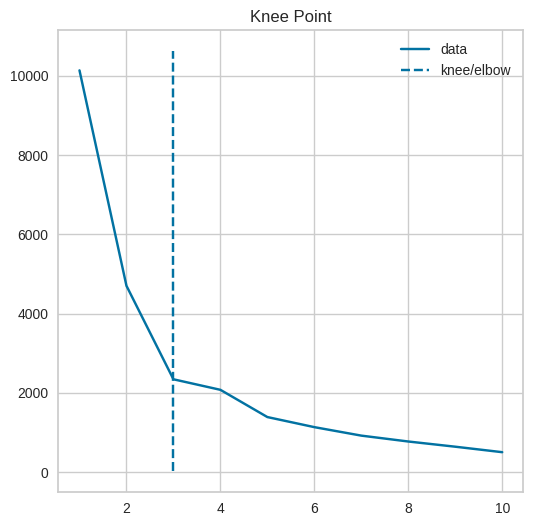

In [ ]:
kneedle.plot_knee()

### 정제된 RFM 데이터로 최적의 k 찾기 (Silhouette method)

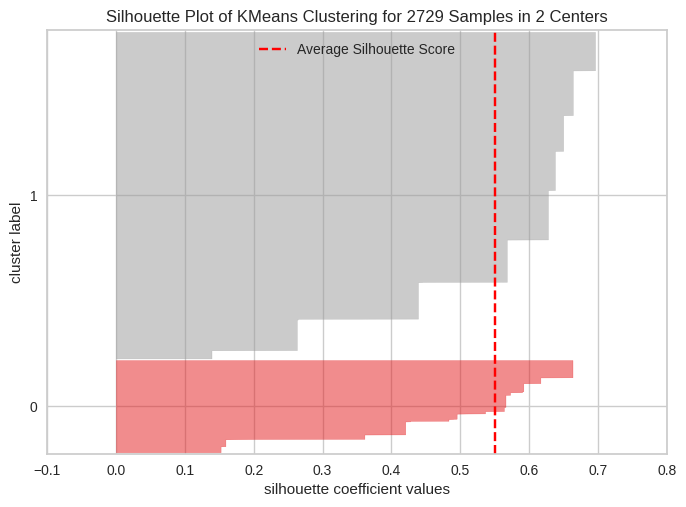

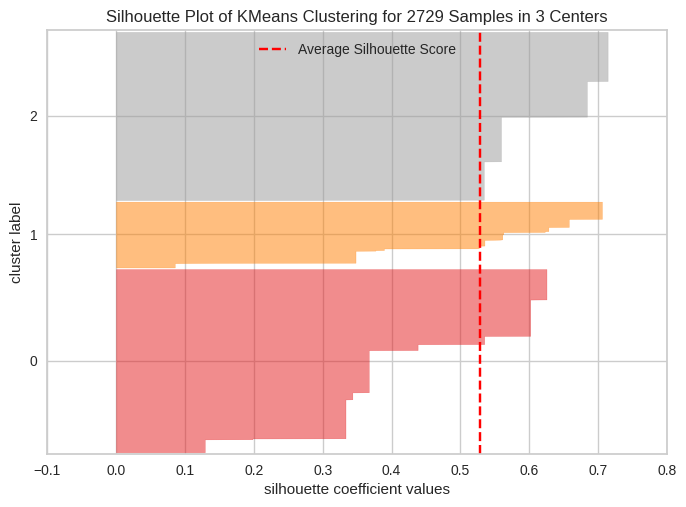

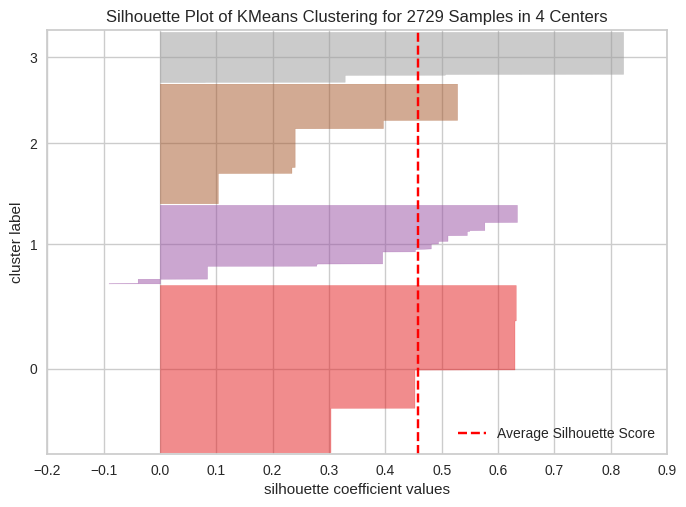

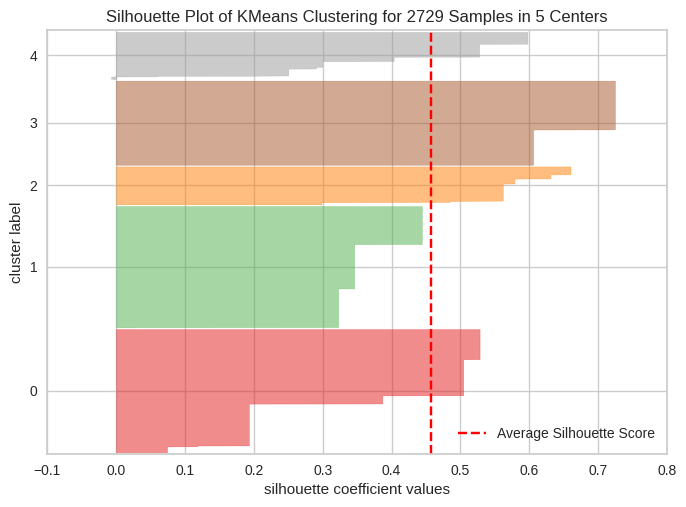

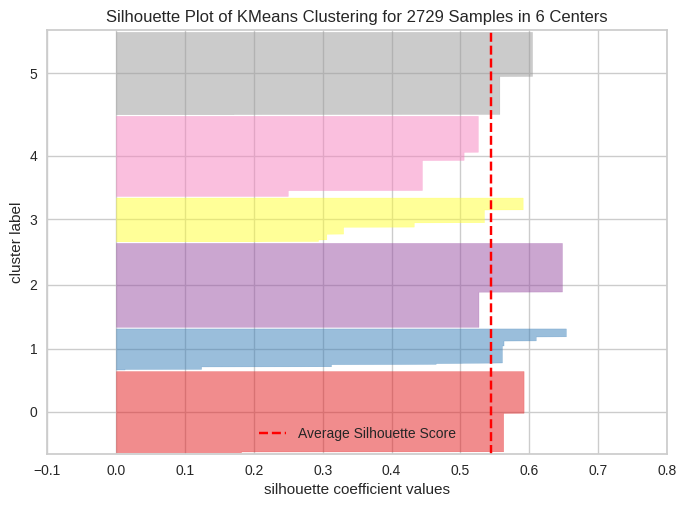

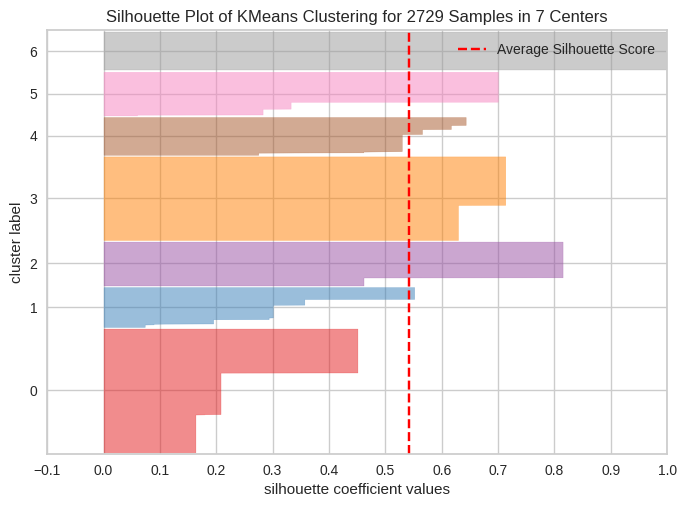

In [ ]:
k_range = range(2,8)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_x)
    visualizer.poof()

### 정규화된 데이터로 훈련된 K-Means 결과 확인/해석

In [ ]:
model = KMeans(n_clusters = 5)
km = model.fit(train_x)
km_label = km.labels_

rfm_train_df = train_x.copy()
rfm_train_df[["R_score","F_score","M_score"]] = rfm_train_df[["R_score","F_score","M_score"]].astype(int)
rfm_train_df["km_label"] = km_label

rfm_cluster_df = rfm_train_df.groupby("km_label").mean()
rfm_cluster_df["point_cnt"] = rfm_train_df["km_label"].value_counts()
rfm_cluster_df


,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.495455,1.000000,1.561818,1100
1,3.413721,1.000000,2.012474,481
2,4.922794,3.555147,4.165441,272
3,3.632541,1.000000,1.000000,547
4,4.726444,1.480243,3.039514,329


In [ ]:
model = KMeans(n_clusters = 6)
km = model.fit(train_x)
km_label = km.labels_

rfm_train_df = train_x.copy()
rfm_train_df[["R_score","F_score","M_score"]] = rfm_train_df[["R_score","F_score","M_score"]].astype(int)
rfm_train_df["km_label"] = km_label

rfm_cluster_df = rfm_train_df.groupby("km_label").mean()
rfm_cluster_df["point_cnt"] = rfm_train_df["km_label"].value_counts()
rfm_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.477273,1.000000,2.003247,616
1,4.839695,2.160305,3.458015,393
2,4.280967,1.000000,1.117825,331
3,3.464896,1.000000,2.098672,527
4,2.029770,1.000000,1.000000,739
5,4.983740,4.227642,4.536585,123


###  K-Means 모델에 test 데이터 예측

In [ ]:
test_cluster = km.predict(test_x)

rfm_test_df = test_x.copy()
rfm_test_df[["R_score","F_score","M_score"]] = rfm_test_df[["R_score","F_score","M_score"]].astype(int)
rfm_test_df["km_label"] = test_cluster

rfm_test_cluster_df = rfm_test_df.groupby("km_label").mean()
rfm_test_cluster_df["point_cnt"] = rfm_test_df["km_label"].value_counts()
rfm_test_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.506757,1.000000,2.000000,148
1,4.858407,2.221239,3.495575,113
2,4.234568,1.000000,1.086420,81
3,3.410596,1.000000,2.086093,151
4,1.982249,1.000000,1.000000,169
5,4.904762,4.095238,4.619048,21


In [ ]:
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"orange", 5:"silver"}
rfm_test_df["km_label_color"] = rfm_test_df["km_label"].map(LABEL_COLOR)

In [ ]:
# 3D 그래프로 변수 3개를 시각화
fig = go.Figure(data=[go.Scatter3d(x=rfm_test_df["R_score"],
                                   y=rfm_test_df["F_score"],
                                   z=rfm_test_df["M_score"],
                                   mode='markers',
                                   marker=dict(color=rfm_test_df["km_label_color"], opacity=0.5))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="R_score"),
                    yaxis = dict(
                        title="F_score"),
                    zaxis = dict(
                        title="M_score"),),
                )

fig.show(showlegend=True)

In [ ]:
trained_rfm_df = pd.concat([rfm_train_df, rfm_test_df])
trained_rfm_df = user_stats_df.join(trained_rfm_df)
trained_rfm_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label,km_label_color
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,4,1,1,2,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,4,NaN


## 고객 군집화를 통해 맴버십 등급의 특징을 파악

### Labeling된 데이터 불러오기

In [ ]:
# 데이터 url
user_metadata_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_metadata_with_labels.csv"
user_stats_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_with_labels.csv"
user_rfm_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_rfm_with_labels.csv"

trained_user_metadata_df = pd.read_csv(user_metadata_with_labels_url, parse_dates=[0])
trained_user_stats_df = pd.read_csv(user_stats_with_labels_url, parse_dates=[0])
trained_rfm_df = pd.read_csv(user_rfm_with_labels_url, parse_dates=[0])

### 메타데이터 그룹의 특징으로 변수명 변경

In [ ]:
trained_user_metadata_df.head(2)

,Unnamed: 0,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0
1,1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0


In [ ]:
trained_user_metadata_df.groupby("label_from_km").agg(user_cnt=("user_id","count"),
                                                      avg_category_prefer=("category_prefer","mean"),
                                                      avg_years_from_joined=("years_from_joined","mean"),
                                                      avg_age=("age","mean"),
                                                      )

,user_cnt,avg_category_prefer,avg_years_from_joined,avg_age
label_from_km,,,,
0,1599,5.747342,0.997999,26.535960
1,1074,5.014898,3.223091,30.870577
2,739,1.499323,1.490934,43.078484


In [ ]:
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 0), "group_name"] = "Young&Trendy Customers"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 1), "group_name"] = "Loyal Customers"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 2), "group_name"] = "Aged Customers"

In [ ]:
trained_user_metadata_df.head(2)

,Unnamed: 0,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km,group_name
0,0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0,Young&Trendy Customers
1,1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0,Young&Trendy Customers


### 메타데이터와 고객 맴버십 등급의 연관성 탐색

In [ ]:
ttl_membership_cnt = trained_user_metadata_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [ ]:
metadata_pivot_df = pd.pivot_table(trained_user_metadata_df,
               values="user_id",
               columns=["group_name"],
               index=["membership_type"],
               aggfunc="count")

metadata_pivot_df

group_name,Aged Customers,Loyal Customers,Young&Trendy Customers
membership_type,,,
100,538,821,1308
300,143,170,200
400,36,43,47
500,22,40,44


In [ ]:
metadata_pivot_df["Aged Customers"] = metadata_pivot_df["Aged Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Loyal Customers"] = metadata_pivot_df["Loyal Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Young&Trendy Customers"] = metadata_pivot_df["Young&Trendy Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Total(%)"] = 1.0

In [ ]:
metadata_pivot_df

group_name,Aged Customers,Loyal Customers,Young&Trendy Customers,Total(%)
membership_type,,,,
100,0.201725,0.307837,0.490439,1.0
300,0.278752,0.331384,0.389864,1.0
400,0.285714,0.341270,0.373016,1.0
500,0.207547,0.377358,0.415094,1.0


### 거래데이터 그룹의 특징으로 변수명 변경

In [ ]:
trained_user_stats_df["scaled_hdbscan_label"] = np.where(trained_user_stats_df["scaled_hdbscan_label"].isnull(), 99, trained_user_stats_df["scaled_hdbscan_label"])
trained_user_stats_df["scaled_hdbscan_label"] = trained_user_stats_df["scaled_hdbscan_label"].astype(int)

In [ ]:
trained_user_stats_df.groupby("scaled_hdbscan_label").agg(user_cnt=("user_id","count"),
                                                      avg_total_order_cnt=("total_order_cnt","mean"),
                                                      avg_cost=("avg_cost","mean"),
                                                      avg_days_of_recency=("days_of_recency","mean"),
                                                      avg_monthly_order_cnt	=("monthly_order_cnt","mean"),
                                                      )

,user_cnt,avg_total_order_cnt,avg_cost,avg_days_of_recency,avg_monthly_order_cnt
scaled_hdbscan_label,,,,,
-1,269,49.708029,45459.533029,167.222628,9.138382
0,10,18.400000,36121.140000,158.300000,3.235000
1,14,92.785714,33595.725714,181.571429,15.464286
2,30,69.966667,38977.182000,180.300000,11.661111
3,239,31.476987,33930.042008,178.677824,5.420990
99,2845,2.169772,30377.488383,66.614060,1.251148


In [ ]:
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 99), "group_name"] = "Unqualified Customers(-)"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == -1), "group_name"] = "High Price&Avg Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 0), "group_name"] = "High Price&Low Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 1), "group_name"] = "Top Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 2), "group_name"] = "Lately&Freq Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 3), "group_name"] = "Average Customers"

In [ ]:
trained_user_stats_df.head(3)

### 거래데이터와 고객 맴버십 등급의 연관성을 탐색

In [ ]:
ttl_membership_cnt = trained_user_stats_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2662
300,513
400,126
500,106


In [ ]:
user_stats_pivot_df = pd.pivot_table(trained_user_stats_df,
               values="user_id",
               columns=["group_name"],
               index=["membership_type"],
               aggfunc="count")

user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customers,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customers(-)
membership_type,,,,,,
100,NaN,0.0,NaN,NaN,NaN,2662.0
300,176.0,168.0,7.0,13.0,2.0,147.0
400,40.0,43.0,3.0,9.0,4.0,27.0
500,23.0,58.0,NaN,8.0,8.0,9.0


In [ ]:
for i in range(0, user_stats_pivot_df.shape[1]):
  user_stats_pivot_df.iloc[:, i] = user_stats_pivot_df.iloc[:, i]/ttl_membership_cnt["user_id"]
user_stats_pivot_df["Total(%)"] = 1.0

In [ ]:
user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customers,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customers(-),Total(%)
membership_type,,,,,,,
100,NaN,0.000000,NaN,NaN,NaN,1.000000,1.0
300,0.343080,0.327485,0.013645,0.025341,0.003899,0.286550,1.0
400,0.317460,0.341270,0.023810,0.071429,0.031746,0.214286,1.0
500,0.216981,0.547170,NaN,0.075472,0.075472,0.084906,1.0


### RFM 그룹의 특징으로 변수명 변경

In [ ]:
trained_rfm_df.head(3)

,Unnamed: 0,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label
0,0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,4
1,1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,0
2,2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136,4,1,1,4


In [ ]:
trained_rfm_df["km_label"] = trained_rfm_df["km_label"].astype(int)
trained_rfm_df["km_label"] = np.where(trained_rfm_df["km_label"].isnull(), 99, trained_rfm_df["km_label"])

In [ ]:
trained_rfm_df.groupby("km_label").agg(user_cnt=("user_id","count"),
                                      avg_r_score=("R_score","mean"),
                                      avg_f_score=("F_score","mean"),
                                      avg_m_score=("M_score","mean"),
                                      )

,user_cnt,avg_r_score,avg_f_score,avg_m_score
km_label,,,,
0,917,1.595420,1.000000,1.000000
1,337,4.469208,3.507331,4.158358
2,364,4.142466,1.545205,3.169863
3,1153,1.533391,1.001735,2.011275
4,636,3.666667,1.000000,1.438679


In [ ]:
trained_rfm_df.loc[(trained_rfm_df.km_label == 0), "group_name"] = "Lost Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 1), "group_name"] = "Best Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 2), "group_name"] = "Good Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 3), "group_name"] = "Close to Lost Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 4), "group_name"] = "Average Customers"

In [ ]:
trained_rfm_df.head(3)

,Unnamed: 0,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label,group_name
0,0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,4,Average Customers
1,1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,0,Lost Customers
2,2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136,4,1,1,4,Average Customers


### RFM 그룹과 고객 맴버십 등급의 연관성 탐색

In [ ]:
ttl_membership_cnt = trained_rfm_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2662
300,513
400,126
500,106


In [ ]:
rfm_pivot_df = pd.pivot_table(trained_rfm_df,
               values="user_id",
               columns=["group_name"],
               index=["membership_type"],
               aggfunc="count")

rfm_pivot_df

group_name,Average Customers,Best Customers,Close to Lost Customers,Good Customers,Lost Customers
membership_type,,,,,
100,611.0,0.0,1136.0,0.0,915.0
300,23.0,176.0,14.0,299.0,1.0
400,1.0,73.0,2.0,49.0,1.0
500,1.0,88.0,1.0,16.0,NaN


In [ ]:
for i in range(0, rfm_pivot_df.shape[1]):
  rfm_pivot_df.iloc[:, i] = rfm_pivot_df.iloc[:, i]/ttl_membership_cnt["user_id"]
rfm_pivot_df["Total(%)"] = 1.0

In [ ]:
rfm_pivot_df

group_name,Average Customers,Best Customers,Close to Lost Customers,Good Customers,Lost Customers,Total(%)
membership_type,,,,,,
100,0.229527,0.000000,0.426747,0.000000,0.343727,1.0
300,0.044834,0.343080,0.027290,0.582846,0.001949,1.0
400,0.007937,0.579365,0.015873,0.388889,0.007937,1.0
500,0.009434,0.830189,0.009434,0.150943,NaN,1.0


##  마무리
- 고객 관련된 데이터는 다양한 종류가 존재함 (메타데이터, 거래데이터 등)
- 상황에 따라 제공되는 파라미터로 모델 성능을 향상시키기 어려운 경우도 많음  이럴때는 데이터 transform이 도움
- raw 데이터를 그대로 사용하기 보다 상황에 맞게 transform해서 사용하는 것이 중요
- 분류되지 않은 데이터이기 때문에 분류의 목적성(i.e., 맴버십 평가 등)을 잃지 않는 것이 중요